In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.txt to train.txt


In [4]:
data = pd.read_csv(
    "train.txt",
    sep=";",
    names=["text", "emotion"]
)

In [5]:
data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['emotion'].value_counts()
    for x_label, grp in _df_2.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('emotion')

In [6]:
stop_words = set(stopwords.words('english'))

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

data['clean_text'] = data['text'].apply(clean_text)

In [8]:
X = data['clean_text']
y = data['emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

In [10]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test_tfidf)

In [17]:
y_pred

array(['sadness', 'joy', 'sadness', ..., 'joy', 'joy', 'sadness'],
      dtype=object)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8725


In [19]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

       anger       0.92      0.83      0.87       427
        fear       0.86      0.77      0.81       397
         joy       0.83      0.97      0.89      1021
        love       0.89      0.63      0.74       296
     sadness       0.91      0.95      0.93       946
    surprise       0.90      0.48      0.62       113

    accuracy                           0.87      3200
   macro avg       0.88      0.77      0.81      3200
weighted avg       0.88      0.87      0.87      3200



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[354,  14,  30,   0,  29,   0],
       [ 14, 307,  47,   0,  23,   6],
       [  1,   3, 988,  19,  10,   0],
       [  3,   3,  92, 186,  12,   0],
       [ 13,   8,  19,   3, 903,   0],
       [  0,  22,  18,   1,  18,  54]])

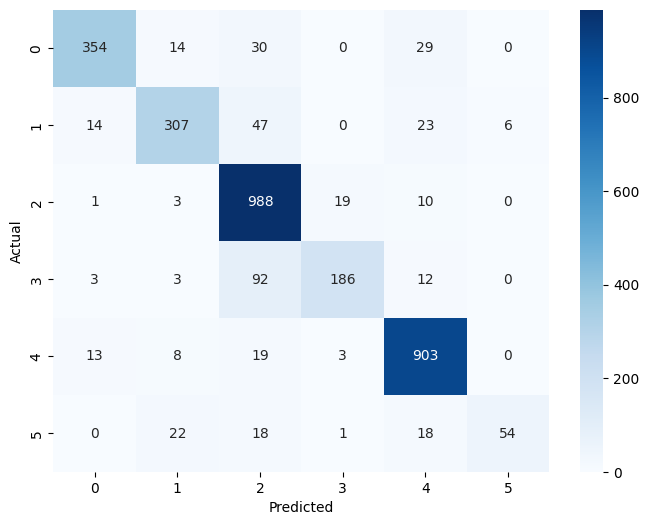

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
def predict_emotion(text):
    text = clean_text(text)
    vector = tfidf.transform([text])
    emotion = model.predict(vector)
    return emotion[0]

In [24]:
print(predict_emotion("I feel very happy and excited today!"))

joy
